In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from time import time
from matplotlib import pyplot as plt

%matplotlib inline

**Exercise 9**

Train Random forest on MNIST then retrain with PCA and compare

In [2]:
mnist=fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [7]:
# Split between training and test set

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [18]:
# Train and time the training

rfc = RandomForestClassifier()
t0 = time()
rfc.fit(X_train, y_train)
print('Training Time: ', round(time() - t0, 3))

Training Time:  81.104


In [20]:
# Accuracy score
rfc.score(X_test, y_test)

0.9699

In [23]:
t0 = time()
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

rfc = RandomForestClassifier()
rfc.fit(X_reduced, y_train)
print('Training Time: ', round(time() - t0, 3))

Training Time:  211.507


In [24]:
# Accuracy score
rfc.score(pca.transform(X_test), y_test)

0.9495

**Exercise 10**

Use t-SNE to visualize MNIST data

In [5]:
from sklearn.manifold import TSNE

In [6]:
X_disp = X[:10000]
y_disp = y[:10000]

In [7]:
# First use PCA to reduce to 50 dim as recommended in the documentation at shorturl.at/ghMRY

pca = PCA(n_components = 50)
X_reduced = pca.fit_transform(X_disp)

# Now use TSNE to reduce to 2 dimensions

tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X_reduced)

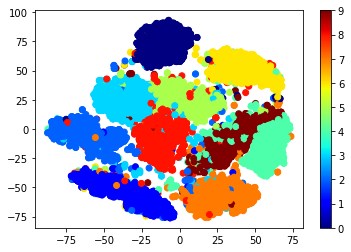

In [26]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_disp.astype(int), cmap="jet")
plt.colorbar()